In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
train = pd.read_csv('test.csv')

Drop outliers:

In [4]:
#train = train[train['GrLivArea'] <= 4000]
train.loc[train['LotArea'] > 30000, 'LotArea'] = 30000

In [5]:
for col in train.columns:
    if train[col].dtype == 'object':
        train[col].fillna('N_A', inplace=True)
    else:
        train[col].fillna(0, inplace=True)

In [6]:
mapping = {'N_A': 0, 
           'Po': 1, 
           'Fa': 2, 
           'TA': 3, 
           'Gd': 4, 
           'Ex': 5}

In [7]:
for col in train.columns:
    if train[col].unique().any() in ['TA', 'Gd', 'Fa', 'Po', 'Ex']:
        train[col] = train[col].map(mapping)

In [8]:
train['FireplaceQu'] = train['FireplaceQu'].map(mapping)

In [9]:
train['yr_since_renovation'] = (train['YrSold'] - train['YearRemodAdd'])

In [10]:
train['AreaQual'] = train['GrLivArea'] * train['OverallQual'] * train['OverallCond']
train['FireplaceQual'] = train['Fireplaces'] * train['FireplaceQu']
train['Bath'] = train['FullBath'] + 0.5 * train['HalfBath']
train['BsmtQuCondSF'] = train['TotalBsmtSF'] * train['BsmtCond'] * train['BsmtQual']
train['DeckPorchSF'] = train[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].sum(axis=1)
train['TotalLivingSF'] = train['1stFlrSF'] + train['2ndFlrSF']
train['BsmtBath'] = train['BsmtFullBath'] + 0.5 * train['BsmtHalfBath']
train['ExterQC'] = train['ExterQual'] + train['ExterCond']
train['KitchenQC'] = train['KitchenAbvGr'] * train['KitchenQual']
train['HouseAge'] = train['YrSold'] - train['YearBuilt']

In [11]:
train.loc[train['HouseAge'] < 0, 'HouseAge'] = 0

In [12]:
train['Finished'] = train['yr_since_renovation'].apply(lambda x: 1 if x > 0 else 0)

In [13]:
train['GarageQu'] = train['GarageQual'] * train['GarageArea'] * train['GarageCond']

Drop unnecessaries

In [14]:
train.drop(['MSSubClass', 'MSZoning'], axis=1, inplace=True)

In [15]:
train.drop('Id', axis=1, inplace=True)

In [16]:
train.drop('LotFrontage', axis=1, inplace=True)

Transformation into ordinal feature:

In [17]:
n_sorted = ['MeadowV', 'BrDale', 'IDOTRR', 'OldTown', 'Edwards', 'BrkSide',
       'Sawyer', 'Blueste', 'SWISU', 'NAmes', 'NPkVill', 'Mitchel', 'SawyerW',
       'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor',
       'Veenker', 'Timber', 'Somerst', 'StoneBr', 'NoRidge', 'NridgHt']

In [18]:
for i, n in enumerate(n_sorted):
    train.loc[train['Neighborhood'] == n, 'neighborhoods_ordinal'] = int(i+1)

In [19]:
train.drop('Neighborhood', axis=1, inplace=True)

In [20]:
train['neighborhoods_ordinal'] = train['neighborhoods_ordinal'].astype('int')

In [21]:
skewness = train.skew().sort_values(ascending=False)
#skewness[abs(skewness) > 0.75]

/var/folders/5j/zxljzwc916b6zz6z50f_wy740000gn/T/ipykernel_7005/3645961841.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = train.skew().sort_values(ascending=False)


In [22]:
skewed_cols = list(skewness[abs(skewness) > 0.5].index)

# Remove 'MSSubClass' and 'SalePrice'
#skewed_cols = [
#    col for col in skewed_cols if col not in ['SalePrice']
#]

# Log-transform skewed columns
for col in skewed_cols:
    train[col] = np.log(1 + train[col])

In [23]:
train

,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,yr_since_renovation,AreaQual,FireplaceQual,Bath,BsmtQuCondSF,DeckPorchSF,TotalLivingSF,BsmtBath,ExterQC,KitchenQC,HouseAge,Finished,GarageQu,neighborhoods_ordinal
0,9.360741,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,6,7.581720,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000000,1.386294,1.386294,CBlock,1.386294,1.386294,No,Rec,6.150603,LwQ,4.976734,5.602119,6.783325,GasA,1.386294,Y,SBrkr,6.799056,0.000000,0.0,6.799056,0.000000,0.000000,1,0.000000,2,0.693147,3,1.791759,Typ,0.000000,0,Attchd,7.581720,Unf,1.0,730.0,1.386294,1.386294,Y,4.948760,0.000000,0.0,0.0,4.795791,0.0,N_A,MnPrv,N_A,0.000000,6,2010,WD,Normal,49,10.199175,0.000000,1.0,8.979543,5.564520,6.799056,0.000000,6,1.386294,3.912023,0.693147,6570.0,10
1,9.565775,Pave,N_A,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,6,7.580189,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,4.691348,1.386294,1.386294,CBlock,1.386294,1.386294,No,ALQ,6.828712,Unf,0.000000,6.008813,7.192934,GasA,1.386294,Y,SBrkr,7.192934,0.000000,0.0,7.192934,0.000000,0.000000,1,0.693147,3,0.693147,4,1.945910,Typ,0.000000,0,Attchd,7.580189,Unf,1.0,312.0,1.386294,1.386294,Y,5.976351,3.610918,0.0,0.0,0.000000,0.0,N_A,N_A,Gar2,9.433564,6,2010,WD,Normal,52,10.775722,0.000000,1.5,9.389490,6.063785,7.192934,0.000000,6,1.609438,3.970292,0.693147,2808.0,10
2,9.534668,Pave,N_A,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,7.599902,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000000,1.386294,1.386294,PConc,1.609438,1.386294,No,GLQ,6.674561,Unf,0.000000,4.927254,6.834109,GasA,1.609438,Y,SBrkr,6.834109,6.553933,0.0,7.396335,0.000000,0.000000,2,0.693147,3,0.693147,3,1.945910,Typ,0.693147,3,Attchd,7.599902,Fin,2.0,482.0,1.386294,1.386294,Y,5.361292,3.555348,0.0,0.0,0.000000,0.0,N_A,MnPrv,N_A,0.000000,3,2010,WD,Normal,12,10.614622,1.386294,2.5,9.318028,5.509388,7.396335,0.000000,6,1.386294,2.639057,0.693147,4338.0,14
3,9.208238,Pave,N_A,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,6,6,7.600402,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,3.044522,1.386294,1.386294,PConc,1.386294,1.386294,No,GLQ,6.401917,Unf,0.000000,5.783825,6.831954,GasA,1.791759,Y,SBrkr,6.831954,6.520621,0.0,7.380879,0.000000,0.000000,2,0.693147,3,0.693147,4,2.079442,Typ,0.693147,4,Attchd,7.600402,Fin,2.0,470.0,1.386294,1.386294,Y,5.888878,3.610918,0.0,0.0,0.000000,0.0,N_A,N_A,N_A,0.000000,6,2010,WD,Normal,12,10.963792,1.609438,2.5,9.028219,5.983936,7.380879,0.000000,6,1.609438,2.564949,0.693147,4230.0,14
4,8.518392,Pave,N_A,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,TwnhsE,1Story,8,5,7.597396,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000000,1.609438,1.386294,PConc,1.609438,1.386294,No,ALQ,5.575949,Unf,0.000000,6.925595,7.155396,GasA,1.791759,Y,SBrkr,7.155396,0.000000,0.0,7.155396,0.000000,0.000000,2,0.000000,2,0.693147,4,1.791759,Typ,0.000000,0,Attchd,7.597396,RFn,2.0,506.0,1.386294,1.386294,Y,0.000000,4.418841,0.0,0.0,4.976734,0.0,N_A,N_A,N_A,0.000000,1,2010,WD,Normal,18,10.843514,0.000000,2.0,9.639587,5.424950,7.155396,0.000000,7,1.609438,2.944439,0.693147,4554.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

/var/folders/5j/zxljzwc916b6zz6z50f_wy740000gn/T/ipykernel_7005/1631727080.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train.hist(ax = ax, bins=30)


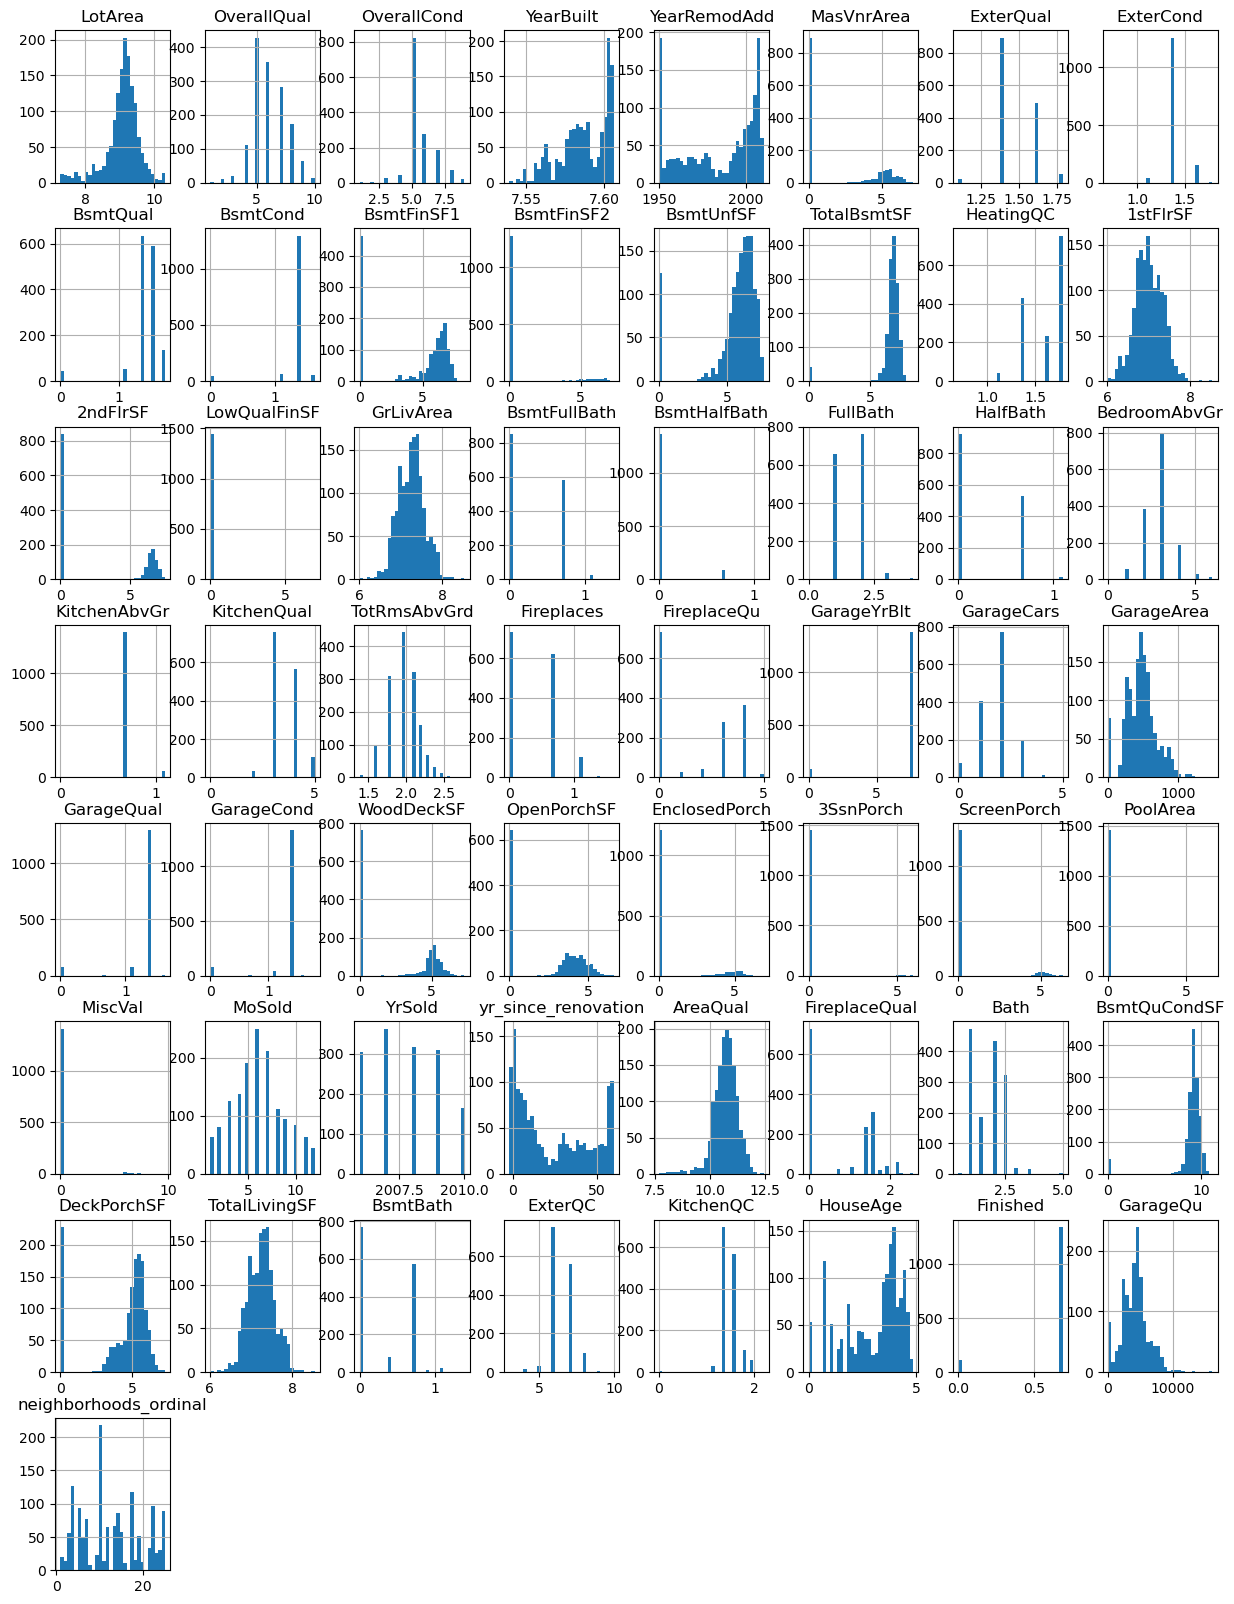

In [24]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train.hist(ax = ax, bins=30)
plt.show()

In [25]:
train.head()

,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,yr_since_renovation,AreaQual,FireplaceQual,Bath,BsmtQuCondSF,DeckPorchSF,TotalLivingSF,BsmtBath,ExterQC,KitchenQC,HouseAge,Finished,GarageQu,neighborhoods_ordinal
0,9.360741,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,6,7.581720,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000000,1.386294,1.386294,CBlock,1.386294,1.386294,No,Rec,6.150603,LwQ,4.976734,5.602119,6.783325,GasA,1.386294,Y,SBrkr,6.799056,0.000000,0.0,6.799056,0.0,0.0,1,0.000000,2,0.693147,3,1.791759,Typ,0.000000,0,Attchd,7.581720,Unf,1.0,730.0,1.386294,1.386294,Y,4.948760,0.000000,0.0,0.0,4.795791,0.0,N_A,MnPrv,N_A,0.000000,6,2010,WD,Normal,49,10.199175,0.000000,1.0,8.979543,5.564520,6.799056,0.0,6,1.386294,3.912023,0.693147,6570.0,10
1,9.565775,Pave,N_A,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,6,7.580189,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,4.691348,1.386294,1.386294,CBlock,1.386294,1.386294,No,ALQ,6.828712,Unf,0.000000,6.008813,7.192934,GasA,1.386294,Y,SBrkr,7.192934,0.000000,0.0,7.192934,0.0,0.0,1,0.693147,3,0.693147,4,1.945910,Typ,0.000000,0,Attchd,7.580189,Unf,1.0,312.0,1.386294,1.386294,Y,5.976351,3.610918,0.0,0.0,0.000000,0.0,N_A,N_A,Gar2,9.433564,6,2010,WD,Normal,52,10.775722,0.000000,1.5,9.389490,6.063785,7.192934,0.0,6,1.609438,3.970292,0.693147,2808.0,10
2,9.534668,Pave,N_A,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,7.599902,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000000,1.386294,1.386294,PConc,1.609438,1.386294,No,GLQ,6.674561,Unf,0.000000,4.927254,6.834109,GasA,1.609438,Y,SBrkr,6.834109,6.553933,0.0,7.396335,0.0,0.0,2,0.693147,3,0.693147,3,1.945910,Typ,0.693147,3,Attchd,7.599902,Fin,2.0,482.0,1.386294,1.386294,Y,5.361292,3.555348,0.0,0.0,0.000000,0.0,N_A,MnPrv,N_A,0.000000,3,2010,WD,Normal,12,10.614622,1.386294,2.5,9.318028,5.509388,7.396335,0.0,6,1.386294,2.639057,0.693147,4338.0,14
3,9.208238,Pave,N_A,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,6,6,7.600402,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,3.044522,1.386294,1.386294,PConc,1.386294,1.386294,No,GLQ,6.401917,Unf,0.000000,5.783825,6.831954,GasA,1.791759,Y,SBrkr,6.831954,6.520621,0.0,7.380879,0.0,0.0,2,0.693147,3,0.693147,4,2.079442,Typ,0.693147,4,Attchd,7.600402,Fin,2.0,470.0,1.386294,1.386294,Y,5.888878,3.610918,0.0,0.0,0.000000,0.0,N_A,N_A,N_A,0.000000,6,2010,WD,Normal,12,10.963792,1.609438,2.5,9.028219,5.983936,7.380879,0.0,6,1.609438,2.564949,0.693147,4230.0,14
4,8.518392,Pave,N_A,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,TwnhsE,1Story,8,5,7.597396,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000000,1.609438,1.386294,PConc,1.609438,1.386294,No,ALQ,5.575949,Unf,0.000000,6.925595,7.155396,GasA,1.791759,Y,SBrkr,7.155396,0.000000,0.0,7.155396,0.0,0.0,2,0.000000,2,0.693147,4,1.791759,Typ,0.000000,0,Attchd,7.597396,RFn,2.0,506.0,1.386294,1.386294,Y,0.000000,4.418841,0.0,0.0,4.976734,0.0,N_A,N_A,N_A,0.000000,1,2010,WD,Normal,18,10.843514,0.000000,2.0,9.639587,5.424950,7.155396,0.0,7,1.609438,2.944439,0.693147,4554.0,23


In [26]:
train.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,yr_since_renovation,AreaQual,FireplaceQual,Bath,BsmtQuCondSF,DeckPorchSF,TotalLivingSF,BsmtBath,ExterQC,KitchenQC,HouseAge,Finished,GarageQu,neighborhoods_ordinal
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,9.076012,6.078821,5.553804,7.586866,1983.662783,2.038185,1.472533,1.403556,1.462499,1.339196,4.220176,0.706567,5.602043,6.711094,1.621487,6.999917,2.794559,0.054371,7.254488,0.295718,0.044739,1.570939,0.259208,2.854010,0.709983,3.507882,1.979498,0.378717,1.710761,7.184339,1.764907,472.444825,1.297775,1.302361,2.442117,2.357489,0.816893,0.046702,0.491784,0.024288,0.236078,6.104181,2007.769705,24.106923,10.720899,0.778685,1.759767,8.956942,4.326485,7.252010,0.320511,6.485264,1.517377,3.036434,0.638037,4193.365319,12.622344
std,0.493669,1.436812,1.113740,0.015481,21.130467,2.613299,0.129306,0.093887,0.301373,0.251753,2.972605,1.911742,1.884929,1.218197,0.201242,0.327842,3.261396,0.557179,0.315917,0.353968,0.172162,0.555190,0.341364,0.829788,0.087132,0.667006,0.198998,0.394844,1.801147,1.708043,0.777056,217.326902,0.316680,0.317177,2.589094,2.156551,1.814052,0.493994,1.513738,0.379828,1.254650,2.722432,1.301740,21.131883,0.539359,0.810368,0.649495,1.718766,2.000136,0.316076,0.349899,0.721240,0.181263,1.321196,0.187580,2074.062260,6.842181
min,7.293698,1.000000,1.000000,7.539027,1950.000000,0.000000,1.098612,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,6.011267,0.000000,0.000000,6.011267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,-2.000000,7.683864,0.000000,0.500000,0.000000,0.000000,6.011267,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8.908154,5.000000,5.000000,7.577634,1963.000000,0.000000,1.386294,1.386294,1.386294,1.386294,0.000000,0.000000,5.393628,6.665684,1.386294,6.773652,0.000000,0.000000,7.019744,0.000000,0.000000,1.000000,0.000000,2.000000,0.693147,3.000000,1.791759,0.000000,0.000000,7.579168,1.000000,317.500000,1.386294,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,4.000000,10.433998,0.000000,1.000000,8.901775,3.951059,7.017506,0.000000,6.000000,1.386294,2.079442,0.693147,2772.000000,7.000000
50%,9.148465,6.000000,5.000000,7.587817,1992.000000,0.000000,1.386294,1.386294,1.386294,1.386294,5.860786,0.000000,6.133398,6.896694,1.791759,6.984716,0.000000,0.000000,7.267525,0.000000,0.000000,2.000000,0.000000,3.000000,0.693147,3.000000,1.945910,0.000000,0.000000,7.589842,2.000000,480.000000,1.386294,1.386294,0.000000,3.367296,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,16.000000,10.758137,0.000000,2.000000,9.213635,5.117994,7.264030,0.000000,6.000000,1.609438,3.555348,0.693147,4284.000000,12.000000
75%,9.351710,7.000000,6.000000,7.601902,200

### Output

In [27]:
train.to_csv('test_preprocessed.csv', index=False)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 89 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                1459 non-null   float64
 1   Street                 1459 non-null   object 
 2   Alley                  1459 non-null   object 
 3   LotShape               1459 non-null   object 
 4   LandContour            1459 non-null   object 
 5   Utilities              1459 non-null   object 
 6   LotConfig              1459 non-null   object 
 7   LandSlope              1459 non-null   object 
 8   Condition1             1459 non-null   object 
 9   Condition2             1459 non-null   object 
 10  BldgType               1459 non-null   object 
 11  HouseStyle             1459 non-null   object 
 12  OverallQual            1459 non-null   int64  
 13  OverallCond            1459 non-null   int64  
 14  YearBuilt              1459 non-null   float64
 15  Year